<h1>Explore whether case amount is relevant to provinces</h1><br>
The consequence is that case amount is not affected by provinces, and most of cases in different provinces are inrelevant

In [1]:
#coding:utf-8
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import os
import cn2an
import chinese2digits as c2d
import operator
import plotly.express as px
import plotly
import seaborn
import plotly.graph_objects as go
import plotly as py
import plotly.offline as offline
from matplotlib import colors
offline.init_notebook_mode(connected=True)

from urllib.request import urlopen
import json
import requests
from plotly.subplots import make_subplots
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas
from pysal.explore import esda   # Exploratory Spatial analytics
from pysal.lib import weights
import pysal
import contextily 

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [3]:
# 在后面绘制地区区域划分图会用到
with open("/Users/starice/OwnFiles/cityu/RA/case_study/code/case_process/china_province.geojson") as f:
    provinces_map = json.load(f)
mapbox_access_token = "pk.eyJ1Ijoic3RhcmljZSIsImEiOiJjazN6Y2s5dTUxY2R6M2xxcHllbXk4YWFzIn0.lActFqLzqRWGn7dqr4BShw"
px.set_mapbox_access_token(mapbox_access_token)

In [5]:
prov_lads = geopandas.read_file("/Users/starice/OwnFiles/cityu/RA/case_study/code/case_process/china_province.geojson")
prov_lads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NL_NAME_1  33 non-null     object  
 1   ENGTYPE_1  33 non-null     object  
 2   geometry   33 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 920.0+ bytes


In [7]:
base_url = "/Users/starice/Desktop/total_extracted_result/"
pre_dir = ['type1', 'type2', 'type3', 'type4']
dir_name = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
dir_sname = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# csv_graph, _new_csvpd = convert_csv_graph(pre_dir[:], dir_name[:], dir_sname[:])
csv_graph = nx.read_gpickle("/Users/starice/Desktop/csv_graph.gpickle")



In [8]:
all_cases = pd.read_csv('/Users/starice/OwnFiles/cityu/RA/case_study/data/total_extracted_result/all_cases.csv', encoding="utf-8")
all_cases['case_id'].drop_duplicates()
all_cases = all_cases[all_cases['defendant'] != all_cases['lawyer']] #去掉有不规范律师的案件（提取时有问题）

In [6]:
# plaintiff_titles = ['上诉人', '上诉人(一审原告)', '上诉人(一审第三人)', '上诉人(原告)', '上诉人(原审原告)', '上诉人(原审原告、反诉被告)', 
#                    '上诉人(原审原告人)', '上诉人(原审第三人)', '公益诉讼起诉人', '再审申请人', '再审申请人(一审原告)',
#  '再审申请人(一审原告、二审上诉人)',
#  '再审申请人(一审原告、二审被上诉人)', '再审申请人(原审原告)',
#  '再审申请人(原审原告、二审上诉人)', '再审申请人:(一审第三人、二审上诉人)', '原告',
#  '原告(反诉被告)', '抗诉机关', '支持起诉人',
#  '支持起诉机关', '申诉人(一审原告、二审上诉人)',
#  '申诉人(一审原告、二审上诉人、再审申请人)',
#  '申诉人(一审原告、二审上诉人、原再审申请人)',
#  '申诉人(一审原告、二审被上诉人)',
#  '申诉人(原审原告)',
#  '申请再审人(一审原告、二审上诉人)', '被上诉人(一审原告)', '被上诉人(原审原告)',
#  '被上诉人(原审原告、反诉被告)', '被上诉人(原甲原告)',
#  '被上诉人一(原审原告)',
#  '被上诉人一(原审被告一)',
#  '被上诉人二(原审被告二)', '被申请人(一审原告、二审上诉人)',
#  '被申请人(一审原告、二审被上诉人)', '被申请人(原审原告)']

# defendant_titles = ['(一审被告、二审被上诉人)', '一审被告', '一审被告(二审上诉人)', '一审被告、二审被上诉人', '一审被告二审上诉人)', 
#                    '上上诉人(原审被告)', '上诉人(一审被告)', '上诉人(原审第一被告)', '上诉人(原审被告)',
#  '上诉人(原审被告、反诉原告)',
#  '上诉人(原审被告一)', '上诉人(被告)', '公益诉讼出庭人', '再审申请人(一审被告)',
#  '再审申请人(一审被告、二审上诉人)',
#  '再审申请人(一审被告、二审被上诉人)', '再审申请人(再审被告)', '再审申请人(原审被告)', '原审当事人(原审被告)',
#  '原审第三被告',
#  '原审第二被告',
#  '原审被告',
#  '原审被告(反诉原告)', '特别授权被告', '申请再审人(原审被告)',
#  '第一被告', '第三被告',
#  '第二被告',
#  '被上诉人',
#  '被上诉人(一审被告)', '被上诉人(原审第三人)',
#  '被上诉人(原审被告)',
#  '被上诉人(原审被告、反诉原告)',
#  '被上诉人(原审被告人)', '被告',
#  '被告(反诉原告)',
#  '被告一',
#  '被告二', '被申诉人(一审被告,二审被上诉人)',
#  '被申诉人(一审被告、二审上诉人)',
#  '被申诉人(一审被告、二审被上诉人)',
#  '被申诉人(一审被告、二审被上诉人、再审被申请人)',
#  '被申诉人(一审被告、二审被上诉人、原再审被申请人)',
#  '被申诉人(原审被告)',
#  '被申请人', '被申请人(一审被告)',
#  '被申请人(一审被告,二审被上诉人)',
#  '被申请人(一审被告、二审上诉人)',
#  '被申请人(一审被告、二审被上诉人)', '被申请人(原审被告)', '被申请人(原审被告、二审被上诉人)']


In [13]:
# cases = [(n, d) for n, d in csv_graph.nodes(data=True) \
#                if d['bipartite']==0]
# plaintiffs = [(e1, e2, d) for e1, e2, d in csv_graph.edges(nbunch=[n[0] for n in cases], data=True) \
#                     if d['title'] in plaintiff_titles]
# defendants = [(e1, e2, d) for e1, e2, d in csv_graph.edges(nbunch=[n[0] for n in cases], data=True) \
#                     if d['title'] in defendant_titles]
# pd_plaintiffs = pd.DataFrame({"case_id": [i[0] for i in plaintiffs], "plaintiff": [i[1] for i in plaintiffs]})
# pd_defendants = pd.DataFrame(({"case_id": [i[0] for i in defendants], "defendant": [i[1] for i in defendants]}))
# pd_cases = pd.DataFrame({"case_id": [i[0] for i in cases], \
#                         "judgement_date": [i[1]['judgement_date'] for i in cases], \
#                          "is_success": [i[1]['is_success'] for i in cases], \
# #                          "lat": [i[1]['lat'] for i in cases], \
# #                          "lon": [i[1]['lon'] for i in cases], \
#                          "court_name": [i[1]['court_name'] for i in cases], \
#                          "procedure": [i[1]['procedure'] for i in cases], \
#                          "judge": [i[1]['judge'] for i in cases], \
#                          "legalfee": [i[1]['legalfee'] for i in cases], \
#                          "objectmoney": [i[1]['objectmoney'] for i in cases], \
#                          "province": [i[1]['province'] for i in cases], \
#                          "city": [i[1]['city'] for i in cases], \
#                          "reason": [i[1]['reason'] for i in cases], \
#                          "district": [i[1]['district'] for i in cases], \
#                          "penalty": [i[1]['penalty'] for i in cases]})
# pd_cases['year'] = pd.DatetimeIndex(pd_cases['judgement_date']).year
# pd_cases['month'] = pd.DatetimeIndex(pd_cases['judgement_date']).month
# pd_cases['day'] = pd.DatetimeIndex(pd_cases['judgement_date']).day
# all_cases = pd_cases.merge(pd_plaintiffs, on="case_id", how="left")
# all_cases = all_cases.merge(pd_defendants, on="case_id", how="left")

In [9]:
location_case_count = all_cases.groupby("province")['case_id'].nunique().reset_index()
location_case_count.rename(columns={"case_id": "case_count"}, inplace=True)
location_case_count.head()

province  case_count
0      上海市        1061
1      云南省         139
2   内蒙古自治区          64
3      北京市        6188
4      吉林省         162

In [25]:
'''
For convenience, let us merge this with the spatial data and 
project the output into the Spherical Mercator coordinate 
reference system (CRS), which will allow us to combine them 
with contextual tiles.
'''
# prov_lads.crs

'\nFor convenience, let us merge this with the spatial data and \nproject the output into the Spherical Mercator coordinate \nreference system (CRS), which will allow us to combine them \nwith contextual tiles.\n'

In [11]:
# moran's i value
prov_lads.crs, location_case_count
db = geopandas.GeoDataFrame(prov_lads, crs=prov_lads.crs)\
              .to_crs(epsg=4326)\
              .dropna()
db.rename(columns={"NL_NAME_1": "province"}, inplace=True)
db = db.merge(location_case_count, on='province')
db.head()

province     ENGTYPE_1                                           geometry  \
0      安徽省      Province  POLYGON ((116.12962 29.82485, 116.12498 29.864...   
1      北京市  Municipality  POLYGON ((117.37974 40.22687, 117.38290 40.208...   
2      重庆市  Municipality  POLYGON ((109.27020 28.50348, 109.23874 28.480...   
3      福建省      Province  MULTIPOLYGON (((117.35570 23.67569, 117.34625 ...   
4      甘肃省      Province  POLYGON ((101.77423 33.54804, 101.76302 33.545...   

   case_count  
0         455  
1        6188  
2        8093  
3         858  
4          38

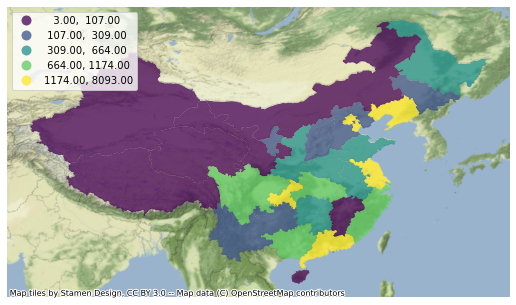

In [12]:
# Geographical distribution of case count
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='case_count', 
        cmap='viridis', 
        scheme='quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={"loc": 2},
        ax=ax
       )
contextily.add_basemap(ax, 
                       crs=db.crs, 
                       source=contextily.providers.Stamen.TerrainBackground,
                       
                      )
ax.set_axis_off()

In [14]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(db, k=5)
# Row-standardization
w.transform = 'R'
db['w_case_count'] = weights.spatial_lag.lag_spatial(w, db['case_count'])
db['case_count_std'] = ( db['case_count'] - db['case_count'].mean() )\
                    / db['case_count'].std()
db['w_case_count_std'] = ( db['w_case_count'] - db['w_case_count'].mean() )\
                    / db['w_case_count'].std()

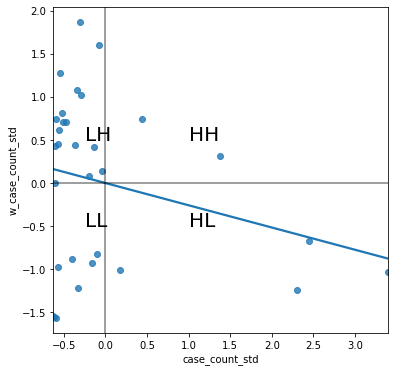

In [15]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(x='case_count_std', y='w_case_count_std', data=db, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
'''
High-high (HH)

Low-high (LH)

Low-low (LL)

High-low (HL)
'''

plt.text(1, 0.5, "HH", fontsize=20)
plt.text(1, -0.5, "HL", fontsize=20)
plt.text(-0.25, 0.5, "LH", fontsize=20)
plt.text(-0.25, -0.5, "LL", fontsize=20)
# Display
plt.show()

# This plot shows that the case count has not significant clustered pattern

In [16]:
# global moran's i
w.transform = 'R'
moran = esda.moran.Moran(db['case_count'], w)
moran.I, moran.p_sim

(-0.11063471675354371, 0.17)

'\nThe values in the left tail of the density represent locations \ndisplaying negative spatial association. There are also two forms, \na high value surrounded by low values, or a low value surrounded \nby high valued neighboring observations.\n'

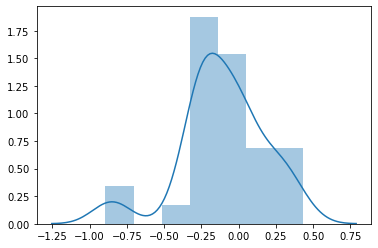

In [17]:
'''
LISAS
The core idea is to identify cases in which the comparison between 
the value of an observation and the average of its neighbors is 
either more similar (HH, LL) or dissimilar (HL, LH) than we would 
expect from pure chance.
'''

lisa = esda.moran.Moran_Local(db['case_count'], w)
seaborn.distplot(lisa.Is)
'''
The values in the left tail of the density represent locations 
displaying negative spatial association. There are also two forms, 
a high value surrounded by low values, or a low value surrounded 
by high valued neighboring observations.
'''

In [18]:
# a map of the 𝐼𝑖 values would be a useful way to visualize the spatial distribution
f, ax = plt.subplots(1, figsize=(9,9))
db['Is'] = lisa.Is
db.plot(column='Is', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
contextily.add_basemap(ax, 
                       crs=db.crs, 
                       source=contextily.providers.Stamen.TerrainBackground
                      )
ax.set_axis_off()

In [23]:
geo_fig = px.choropleth_mapbox(
    data_frame = db,
    geojson = provinces_map,
#     color = np.log10(location_pd_penalty['penalty']),
    color = 'Is', 
    locations = "province",
    featureidkey = "properties.NL_NAME_1",
    color_continuous_scale = px.colors.diverging.BrBG, 
    center = {"lat": 37.110573, "lon": 106.493924},
    zoom = 3,
    hover_data = ['Is'], 
    title = "a map of the 𝐼𝑖 values"
)
geo_fig.update_layout(height = 800)
geo_fig.show()

In [20]:
print(lisa.q[:20])
'''
The correspondence between the numbers in the q attribute and the actual quadrants is as follows:

1: HH

2: LH

3: LL

4: HL
'''
# 如何解释天津和辽宁地区案件关联的异常（可能会出现，但整体不相关的pattern很明显）

[3 4 4 2 2 4 2 2 2 2 2 3 2 2 4 3 2 1 2 2]


'\nThe correspondence between the numbers in the q attribute and the actual quadrants is as follows:\n\n1: HH\n\n2: LH\n\n3: LL\n\n4: HL\n'

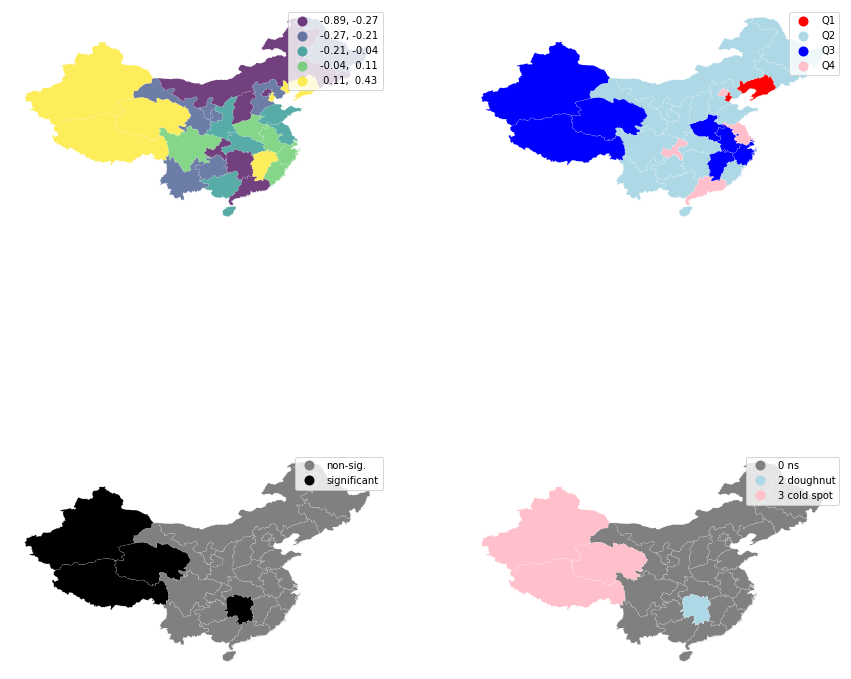

In [21]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
# Make the axes accessible with single indexing
axs = axs.flatten()

                    # Subplot 1 #
ax = axs[0]
db.plot(column='Is', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True, ax=ax)
ax.set_aspect('equal')
ax.set_axis_off()

                    # Subplot 2 #
ax = axs[1]
q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
labels = [q_labels[i-1] for i in lisa.q]
hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
db.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

ax.set_aspect('equal')
ax.set_axis_off()

                    # Subplot 3 #

ax = axs[2]
sig = 1 * (lisa.p_sim < 0.05)
hmap = colors.ListedColormap(['grey','black'])
labels = ['non-sig.', 'significant'] 
labels = [labels[i] for i in sig]
db.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

ax.set_aspect('equal')
ax.set_axis_off()
                            
                    # Subplot 4 #
ax = axs[3]
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap([ 'grey', 'red', 'lightblue', 'blue', 'pink'])


db.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

ax.set_aspect('equal')
ax.set_axis_off()


# Display the figure
plt.show()

In [27]:
# output this ipynb to html with no code
!jupyter nbconvert MoransI.ipynb --no-input --to html

[NbConvertApp] Converting notebook MoransI.ipynb to html
